<a href="https://colab.research.google.com/github/Donika1999/Machine-Learning-Algorithms/blob/master/Logistic%20regression%20with%20quadratic%20decision%20boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sn
import numpy as np
from google.colab import files
uploaded=files.upload()

import io
#a #not using lda
mat=pd.read_excel(io.BytesIO(uploaded['ex2data2.xls']))

Saving ex2data2.xls to ex2data2.xls


In [0]:
x1=mat['x1']
x2=mat['x2']
x1=np.array(x1.T)
x2=np.array(x2.T)
x1=(x1-np.mean(x1))/np.std(x1)
y=mat['y']
y=np.array(y.T)[:]



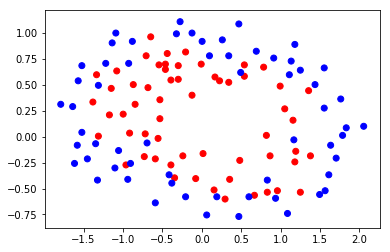

In [0]:
c=['blue','red']
a=[]
for i in range(118):
    a.append(c[y[i]])
plt.scatter(x1,x2,c=a) 

In [0]:
degree=2


In [0]:
def mapFeature(x1, x2, degree):
    res = np.ones(x1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (x1 ** (i-j)) * (x2 ** j)))
    
    return res

In [0]:
X = mat.iloc[:, :2]
X_poly = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree)
y = mat.iloc[:, 2]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.1)
y_test.shape
X_train.shape
y_test.shape
y_test=np.array(y_test.T)
y_test.shape
y_test[0]
y_train=np.array(y_train.T)

In [0]:
def sigmoid(theta, X): 
    return 1.0/(1 + np.exp(-np.dot(X, theta.T)))

In [0]:
def cost_f(theta1, X, y): 
    log_v = sigmoid(theta1, X) 
    y = np.squeeze(y) 
    step1 = y * np.log(log_v) 
    step2 = (1 - y) * np.log(1 - log_v) 
    final = -step1 - step2 
    return np.mean(final)

In [0]:
def log(theta1, X, y): 
    ans1 = sigmoid(theta1, X) - y.reshape(X.shape[0], -1) 
    ans = np.dot(ans1.T, X) 
    return ans

In [0]:
def grad_desc(X, y,theta1, lr=.01, precision=.001): 
    cost = cost_f(theta1, X, y) 
    change_cost = 1
    num_iter = 1
      
    while(change_cost > precision): 
        old_cost = cost 
        theta1 = theta1 - (lr * log(theta1, X, y)) 
        cost = cost_f(theta1, X, y) 
        change_cost = old_cost - cost 
        num_iter += 1
      
    return theta1, num_iter

In [0]:
theta1=np.matrix(np.zeros(X_poly.shape[1]))
theta1, num_iter = grad_desc(X_train, y_train, theta1) 

In [0]:
print(theta1.shape)
print("theta values:", theta1) 
print("No. of iterations:", num_iter) 

(1, 6)
theta values: [[  4.30293824   2.47129021   3.30691028  -9.65990923  -5.83594135
  -10.18828931]]
No. of iterations: 1403


In [0]:
def plotDecisionBoundary(theta1,degree, axes):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta1)
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0])
    return cs
   

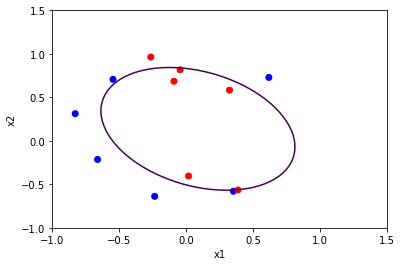

In [0]:
fig, axes = plt.subplots();
axes.set_xlabel('x1')
axes.set_ylabel('x2')
#axes.scatter(mat.loc[pos, 'x1'], mat.loc[pos, 'x2'], color = 'r' )
#axes.scatter(mat.loc[neg, 'x1'], mat.loc[neg, 'x2'], color = 'b')
c=['blue','red']
a=[]
for i in range(12):
    a.append(c[y_test[i]])
axes.scatter(X_test[:,1],X_test[:,2],c=a)    
plotDecisionBoundary(theta1.T, degree, axes)

In [0]:
def pred(theta1, X): 
    pred_prob = sigmoid(theta1, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value)

In [0]:
y_pred = pred(theta1, X_test)

In [0]:
print("Correctly predicted labels:", np.sum(y_test == y_pred))
print("Accuracy", (np.sum(y_test==y_pred)/12)*100)

Correctly predicted labels: 10
Accuracy 83.33333333333334


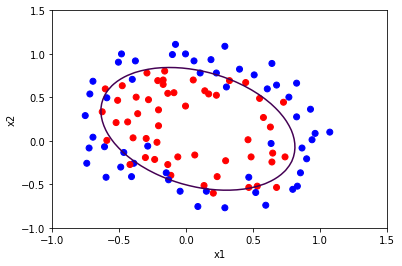

In [0]:
fig, axes = plt.subplots();
axes.set_xlabel('x1')
axes.set_ylabel('x2')

c=['blue','red']
a=[]
for i in range(106):
    a.append(c[y_train[i]])
axes.scatter(X_train[:,1],X_train[:,2],c=a)    
plotDecisionBoundary(theta1.T, degree, axes)

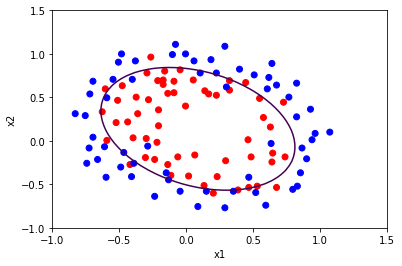

In [0]:
fig, axes = plt.subplots();
axes.set_xlabel('x1')
axes.set_ylabel('x2')

c=['blue','red']
a=[]
for i in range(118):
    a.append(c[y[i]])
axes.scatter(X_poly[:,1],X_poly[:,2],c=a)    
plotDecisionBoundary(theta1.T, degree, axes)